In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, Normalizer

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [4]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df = df.drop(["LONGITUDE", "LATITUDE", "BHK_OR_RK"], axis=1)

In [10]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",60.5
...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.000000,1,1,"Shamshabad Road,Agra",45.0
29447,Owner,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",16.0
29448,Dealer,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",27.1
29449,Owner,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",67.0


In [11]:
df["ADDRESS"].unique()

array(['Ksfc Layout,Bangalore', 'Vishweshwara Nagar,Mysore',
       'Jigani,Bangalore', ..., 'west mambalam,Chennai',
       'Gandhi Nagar,Gulbarga', 'E3-108, Lake View Recidency,,Vapi'],
      dtype=object)

In [12]:
len(df["ADDRESS"].unique())

6899

In [13]:
df = df[df["TARGET(PRICE_IN_LACS)"]<15000]
df = df[df["SQUARE_FT"]<2e5]

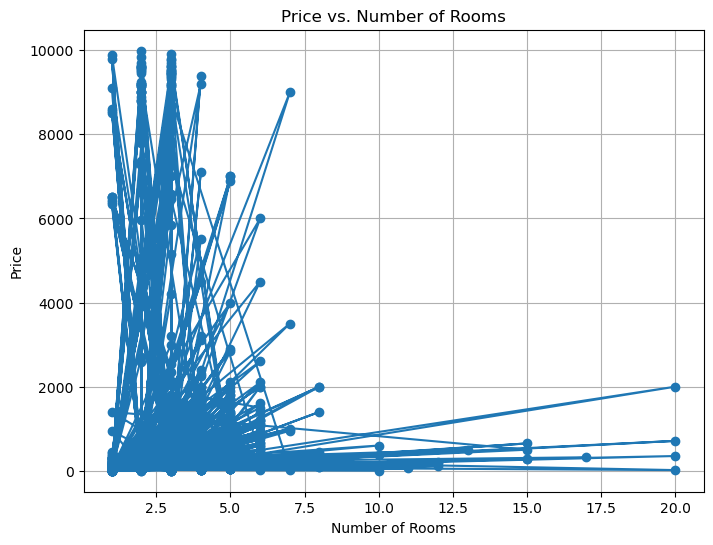

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(df["BHK_NO."], df["TARGET(PRICE_IN_LACS)"], marker="o")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.title("Price vs. Number of Rooms")
plt.grid(True)
plt.show()

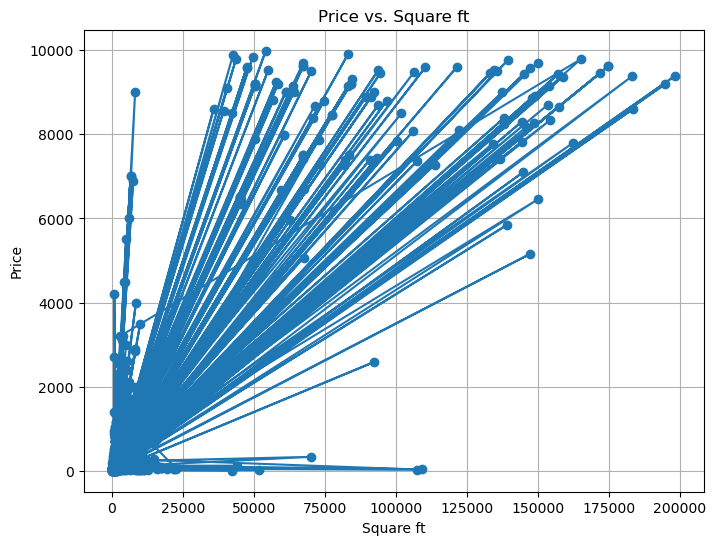

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(df["SQUARE_FT"], df["TARGET(PRICE_IN_LACS)"], marker="o")
plt.xlabel("Square ft")
plt.ylabel("Price")
plt.title("Price vs. Square ft")
plt.grid(True)
plt.show()

In [16]:
df["TARGET(PRICE_IN_LACS)"].unique()

array([  55. ,   51. ,   43. , ..., 1170. , 8660. ,   18.3])

In [17]:
label_encoder = LabelEncoder()

In [18]:
df["POSTED_BY"] = label_encoder.fit_transform(df["POSTED_BY"])
df["ADDRESS"] = label_encoder.fit_transform(df["ADDRESS"])

In [19]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,2,0,0,2,1300.236407,1,1,2843,55.0
1,1,0,0,2,1275.000000,1,1,6572,51.0
2,2,0,0,2,933.159722,1,1,2255,43.0
3,2,0,1,2,929.921143,1,1,5091,62.5
4,1,1,0,2,999.009247,0,1,3827,60.5
...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,2500.000000,1,1,5590,45.0
29447,2,0,0,2,769.230769,1,1,1509,16.0
29448,1,0,0,2,1022.641509,1,1,149,27.1
29449,2,0,0,2,927.079009,1,1,5703,67.0


In [20]:
X = df.drop(["TARGET(PRICE_IN_LACS)"], axis=1)
Y = df["TARGET(PRICE_IN_LACS)"]

In [21]:
scaler = Normalizer()

In [22]:
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, shuffle=True ,random_state=101)

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = model.predict(X_test)

In [27]:
model.score(X_test,y_test)

0.9409441832780011

# Prediction on test file

In [28]:
test = pd.read_csv("test.csv")

In [29]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [30]:
test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [32]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [33]:
test.dropna(inplace=True)

In [34]:
test.drop_duplicates(inplace=True)

In [35]:
test = test.drop(["LONGITUDE", "LATITUDE", "BHK_OR_RK"], axis=1)

In [36]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,Owner,0,0,1,545.171340,1,1,"Kamrej,Surat"
1,Dealer,1,1,2,800.000000,0,0,"Panvel,Lalitpur"
2,Dealer,0,0,2,1257.096513,1,1,"New Town,Kolkata"
3,Dealer,0,0,3,1400.329489,1,1,"Kalwar Road,Jaipur"
4,Owner,0,0,1,430.477830,1,1,"Mai Mandir,Nadiad"
...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,856.555505,1,1,"Thane West,Maharashtra"
68716,Dealer,0,1,3,2304.147465,1,1,"Sector-66A Mohali,Mohali"
68717,Dealer,1,1,1,33362.792750,0,0,"Balkum,Maharashtra"
68718,Dealer,0,0,2,1173.708920,1,1,"Hadapsar,Pune"


In [37]:
test["POSTED_BY"] = label_encoder.fit_transform(test["POSTED_BY"])
test["ADDRESS"] = label_encoder.fit_transform(test["ADDRESS"])

In [38]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,2,0,0,1,545.171340,1,1,3903
1,1,1,1,2,800.000000,0,0,6484
2,1,0,0,2,1257.096513,1,1,6092
3,1,0,0,3,1400.329489,1,1,3843
4,2,0,0,1,430.477830,1,1,4995
...,...,...,...,...,...,...,...,...
68715,1,0,1,2,856.555505,1,1,9649
68716,1,0,1,3,2304.147465,1,1,8609
68717,1,1,1,1,33362.792750,0,0,878
68718,1,0,0,2,1173.708920,1,1,3018


In [39]:
test = test[test["SQUARE_FT"]<2e5]

In [40]:
X = test

In [41]:
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,2,0,0,1,545.171340,1,1,3903
1,1,1,1,2,800.000000,0,0,6484
2,1,0,0,2,1257.096513,1,1,6092
3,1,0,0,3,1400.329489,1,1,3843
4,2,0,0,1,430.477830,1,1,4995
...,...,...,...,...,...,...,...,...
68715,1,0,1,2,856.555505,1,1,9649
68716,1,0,1,3,2304.147465,1,1,8609
68717,1,1,1,1,33362.792750,0,0,878
68718,1,0,0,2,1173.708920,1,1,3018


In [42]:
X = scaler.transform(X)

In [43]:
test["Price(in lakhs)"] = model.predict(X)

C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_26284\2386549434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Price(in lakhs)"] = model.predict(X)


In [44]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,Price(in lakhs)
0,2,0,0,1,545.171340,1,1,3903,26.8820
1,1,1,1,2,800.000000,0,0,6484,81.5160
2,1,0,0,2,1257.096513,1,1,6092,140.2790
3,1,0,0,3,1400.329489,1,1,3843,69.9520
4,2,0,0,1,430.477830,1,1,4995,23.1130
...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,856.555505,1,1,9649,48.8441
68716,1,0,1,3,2304.147465,1,1,8609,106.3140
68717,1,1,1,1,33362.792750,0,0,878,9010.9000
68718,1,0,0,2,1173.708920,1,1,3018,85.6350
